In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**By Using Pandas we will read our Data**


In [ ]:
df = pd.read_csv('/content/CAR DETAILS.csv')
df.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner


**for viewing the shape and info of the dataset we use the following step**

In [ ]:
row, col =df.shape
print('row =' , row, 'col = ' , col)
df.info()

row = 4340 col =  8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
#To get the model of the car split the column name

df["model"]= df.name.apply(lambda x : ' '.join(x.split(' ')[:1]))
df["model"].value_counts()


Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Fiat               37
Datsun             37
Mercedes-Benz      35
Jaguar              6
Mitsubishi          6
Land                5
Volvo               4
Ambassador          4
Jeep                3
MG                  2
OpelCorsa           2
Daewoo              1
Force               1
Isuzu               1
Kia                 1
Name: model, dtype: int64

In [ ]:
#Check null values in Dataset

df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
model            0
dtype: int64

In [ ]:
#Check Duplicate Row in  Dataset
df[df.duplicated()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,model
13,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
14,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
15,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
16,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
17,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda
...,...,...,...,...,...,...,...,...,...
4307,Mahindra Xylo H4,2019,599000,15000,Diesel,Individual,Manual,Third Owner,Mahindra
4308,Maruti Alto 800 LXI,2018,200000,35000,Petrol,Individual,Manual,First Owner,Maruti
4309,Datsun GO Plus T,2017,350000,10171,Petrol,Dealer,Manual,First Owner,Datsun
4310,Renault Duster 110PS Diesel RxL,2015,465000,41123,Diesel,Dealer,Manual,First Owner,Renault


In [ ]:
#Drop all Duplicated row

df = df.drop_duplicates()

df.shape

(3577, 9)

In [ ]:
#To get the Columns Types

df.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
model            object
dtype: object

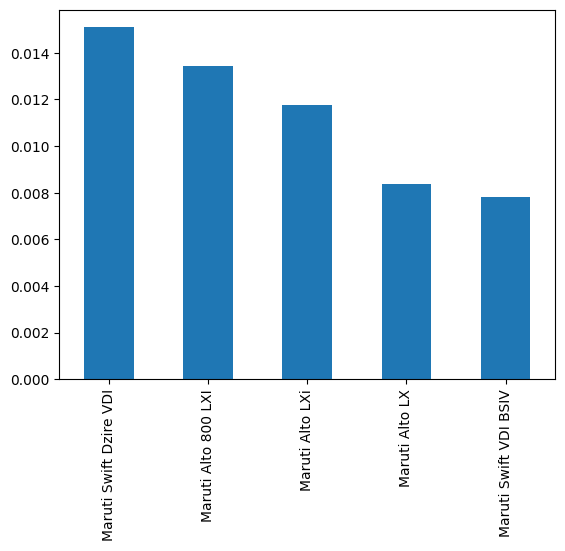

In [ ]:
#We use (value_counts) To Know the Sold Numbers of Each car using Plot we will Draw the Graph

df["name"].value_counts(normalize = True)[:5].plot(kind = 'bar')
plt.show()

In [ ]:
#Add new Column by Brand Name Split First Part

df["brand"]= df.name.apply(lambda x : ' '.join(x.split(' ')[:1]))
df['brand']

0        Maruti
1        Maruti
2       Hyundai
3        Datsun
4         Honda
         ...   
4335    Hyundai
4336    Hyundai
4337     Maruti
4338    Hyundai
4339    Renault
Name: brand, Length: 4340, dtype: object

In [ ]:
#To know countvalue in column
df.brand.value_counts()

Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Fiat               37
Datsun             37
Mercedes-Benz      35
Jaguar              6
Mitsubishi          6
Land                5
Volvo               4
Ambassador          4
Jeep                3
MG                  2
OpelCorsa           2
Daewoo              1
Force               1
Isuzu               1
Kia                 1
Name: brand, dtype: int64

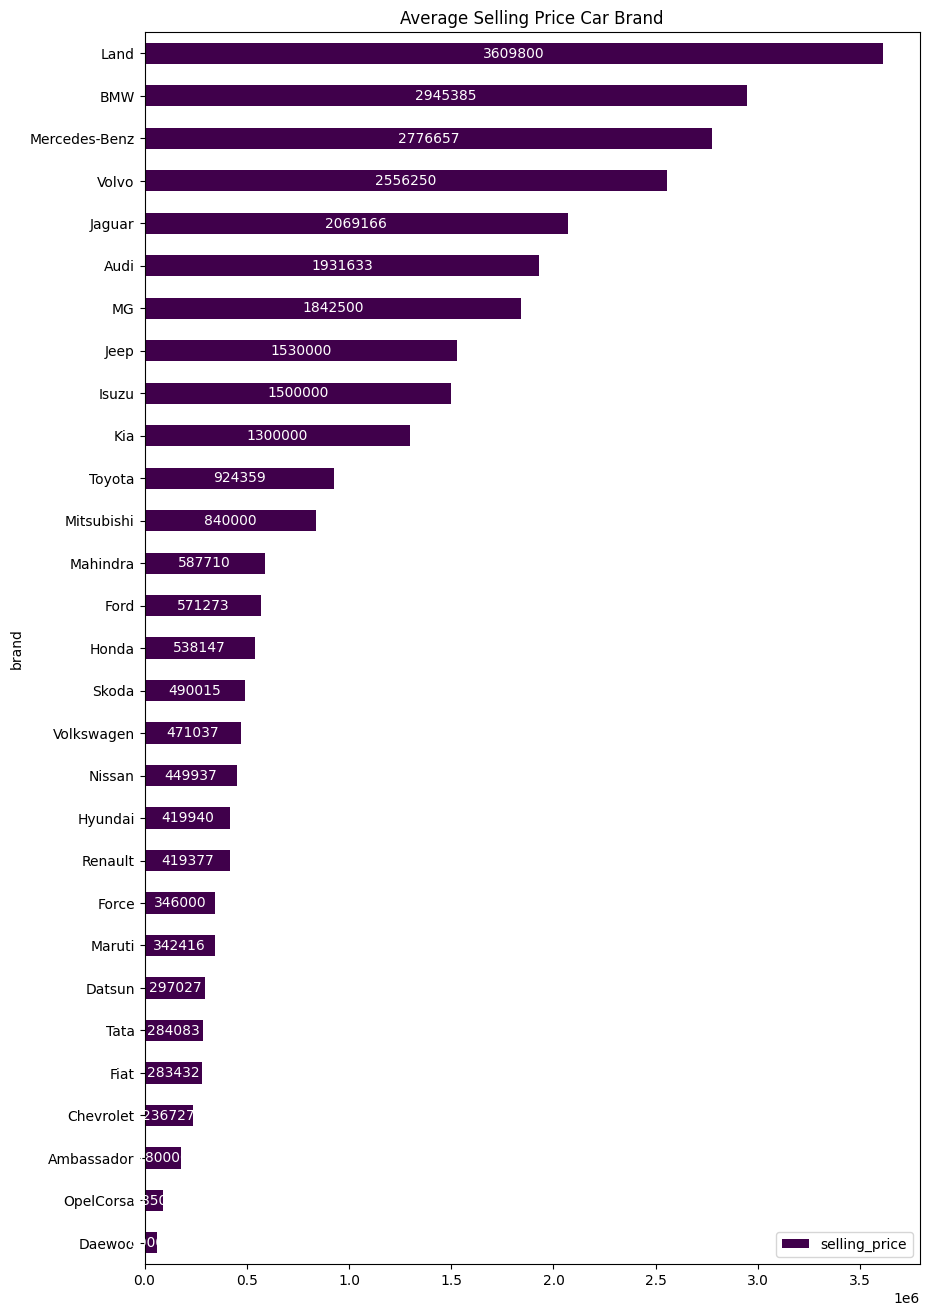

In [ ]:
#using groupby and mean to extract values & plot to draw the graph

price = df.groupby(['brand'])[['selling_price']].mean()
price.sort_values(by='selling_price',ascending=True, inplace= True)
ax  = price.plot(kind='barh', cmap='PRGn' , figsize=(10,16) ,title= 'Average Selling Price Car Brand')
for c in ax.containers:

    #set the bar label

     ax.bar_label(c, fmt='%.0f',label_type='center', color='w',rotation=0)

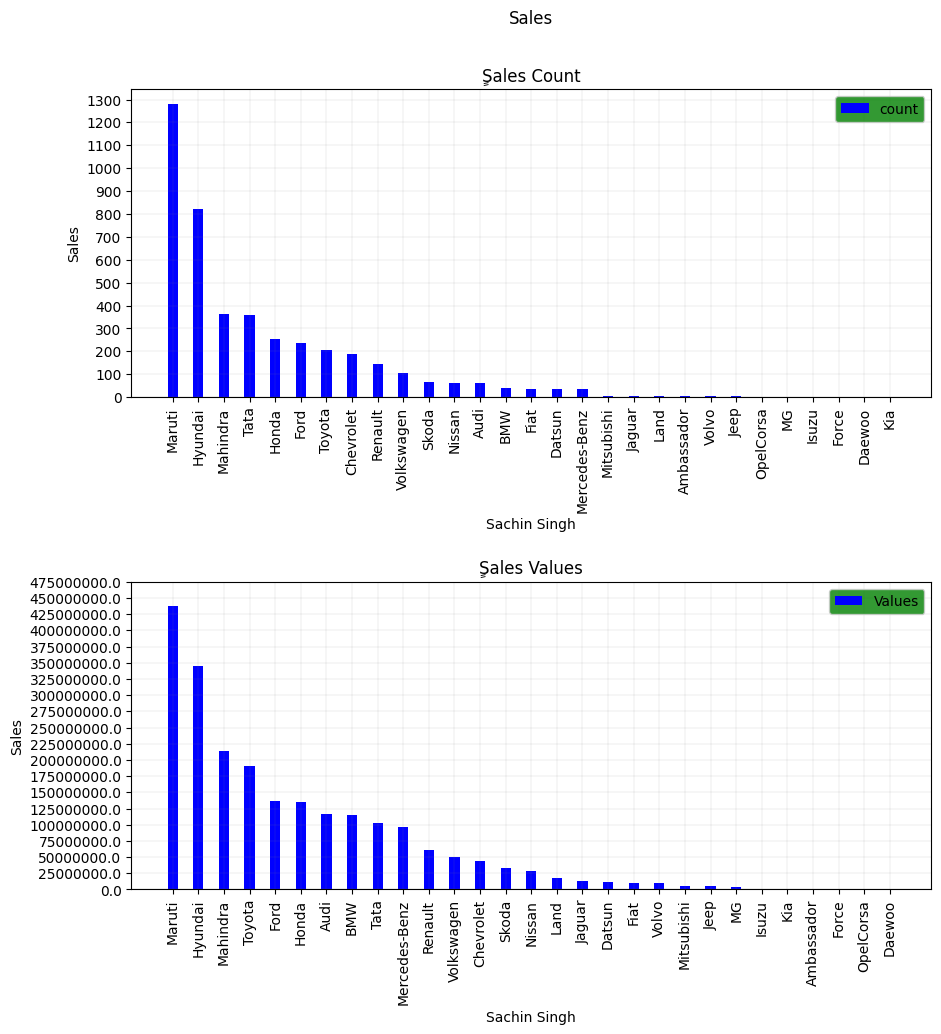

In [ ]:
# We will display sales by count and value in separate graphs

#plot 1:

data = df.groupby(['brand'])['brand'].count().sort_values(ascending=False)

 #to extract the count
x = data.index

# to extract the brand name
y = data.values

# to extract the count to brand
plt.subplot(2, 1, 1)

#The location of the first graph

#the figure has 2 row, 1 columns, and this plot is the first plot.

plt.bar(x, y, color ='blue',width = 0.4)
plt.rcParams['axes.facecolor'] = '#FFFFFF'#background c
plt.xticks(rotation=90) #MMake the text of the label at  angle 90
plt.xlabel("Sachin Singh",fontsize=10,color="black")
plt.ylabel("Sales",fontsize=10,color="black")
plt.title("ٍSales Count",color="black")
plt.legend(["count"], loc ="upper right" ,facecolor='green', labelcolor='black')#Fomat and name to legend
plt.rcParams['figure.figsize'] = [10, 10]#Determine the size of the graph
plt.grid(color='grey', linestyle='-', linewidth=.1)#Fomat grid network that appears in graph background
#plt.xlim([0, 1]) #
#plt.ylim([0, 2000])#
#plt.locator_params(axis='x', nbins=20)#
plt.locator_params(axis='y', nbins=20)# to make y texts 100-200-300-- like that

#plot 2:

plt.subplot(2, 1, 2)

#the figure has 2 row, 1 columns, and this plot is the second plot.

data = df.groupby(['brand'])['selling_price'].sum().sort_values(ascending=False)

x = data.index # to extract the brand name

y = data.values #to extract the sum to brand

plt.bar(x, y, color ='blue',width = 0.4)

plt.rcParams['axes.facecolor'] = '#FFFFFF'

plt.xticks(rotation=90)
plt.xlabel("Sachin Singh",fontsize=10,color="black")
plt.ylabel("Sales",fontsize=10,color="black")
plt.title("ٍSales Values",color="black")
plt.legend(["Values"], loc ="upper right" ,facecolor='green', labelcolor='black')
plt.rcParams['figure.figsize'] = [10, 10]
plt.grid(color='grey', linestyle='-', linewidth=.1)

plt.locator_params(axis='y', nbins=20)
#plt.margins(x=0, y=0)
plt.yticks(ticks=plt.yticks()[0], labels=plt.yticks()[0])# Show real values,numbers big without it appear short
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9,top=0.9,wspace=0.5, hspace=0.6)# set the spacing between subplots
plt.suptitle("Sales")#Name for the whole graph
plt.show()#view

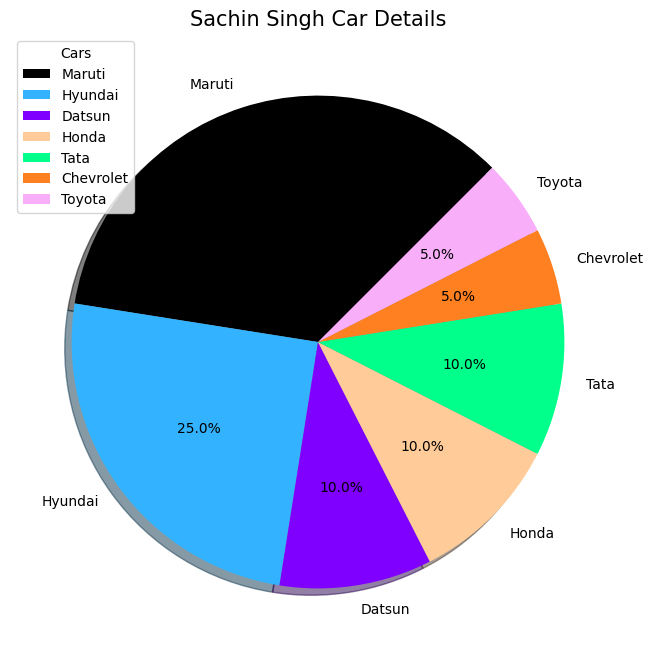

In [ ]:
## We will display sales by count in pie graphs

labels = df["brand"][:20].value_counts().index #We chose only twenty

sizes = df["brand"][:20].value_counts() # We chose only twenty

data = df.groupby(['brand'])['brand'].count().sort_values(ascending=False)#to extract the count
x = data.index
y = data.values
colors = ['#000000','#33b3ff','#8000FF','#ffcc99',"#00FF8B","#FF8020","#F8AEF8"]#color choice
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',colors=colors,shadow=True, startangle=45)#Fomat pie
plt.title('Sachin Singh Car Details',color = 'black',fontsize = 15)#Fomat title
plt.legend(title = "Cars")
plt.show()

In [ ]:
#To know countnvalue in year coulmn
df.year.value_counts()

2017    466
2015    421
2012    415
2013    386
2014    367
2018    366
2016    357
2011    271
2010    234
2019    195
2009    193
2008    145
2007    134
2006    110
2005     85
2020     48
2004     42
2003     23
2002     21
2001     20
1998     12
2000     12
1999     10
1997      3
1996      2
1995      1
1992      1
Name: year, dtype: int64

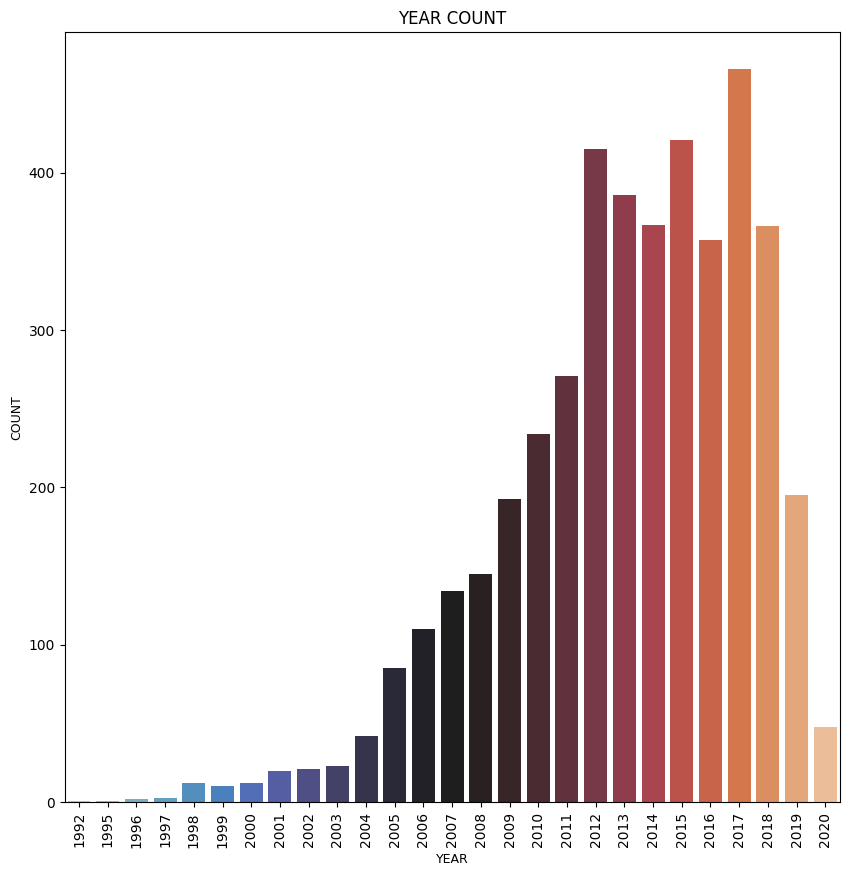

In [ ]:
sns.countplot(data=df,x="year",palette="icefire")
plt.xticks(rotation=90)
plt.xlabel("YEAR",fontsize=9,color="BLACK")
plt.ylabel("COUNT",fontsize=9,color="BLACK")
plt.title("YEAR COUNT",color="BLACK")
plt.show()

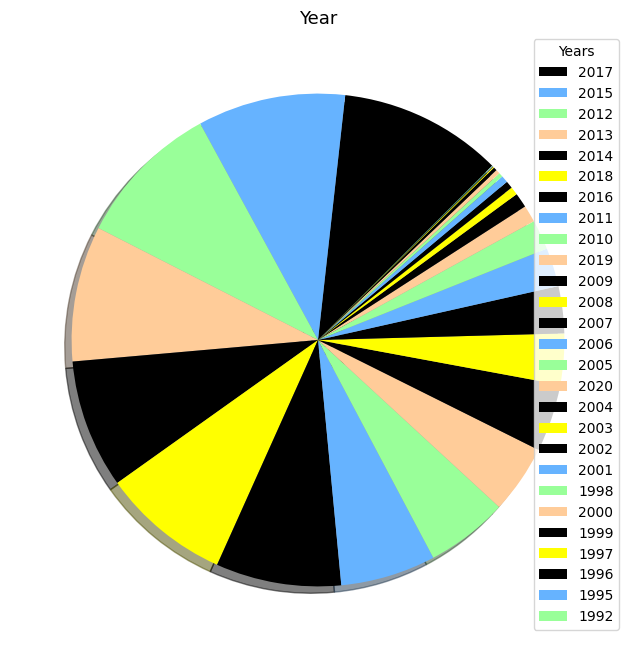

In [ ]:
#We will display pie graphs
labels = df["year"].value_counts().index
sizes = df["year"].value_counts()
colors = ['#000000','#66b3ff','#99ff99','#ffcc99',"black","yellow"]
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels , rotatelabels=False, autopct=None,colors=colors,shadow=True, startangle=45, labeldistance=None)
plt.title('Year',color = 'black',fontsize = 13)
plt.legend(title = "Years", loc='upper right')
plt.show()

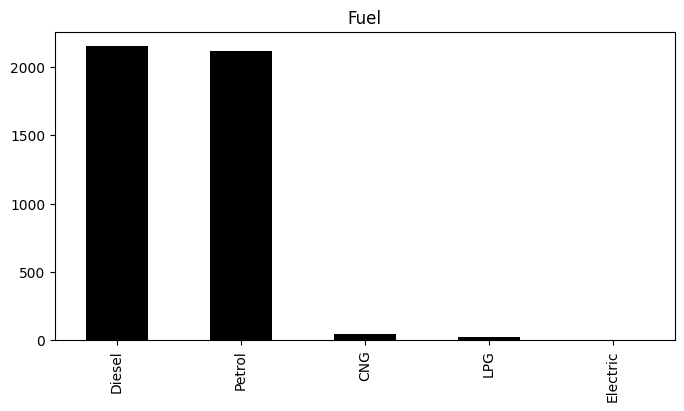

In [ ]:
#We will display bar graphs classified by fuels
df["fuel"].value_counts(sort =True).plot(kind="bar", color=["black"], figsize=(8, 4) , title='Fuel');

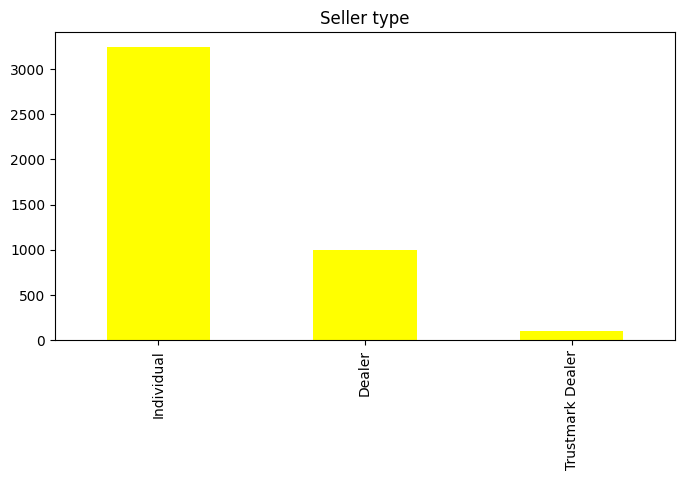

In [ ]:
#We will display bar graphs of seller type
df["seller_type"].value_counts(sort = True).plot(kind="bar", color=["yellow"], figsize=(8, 4) , title='Seller type');

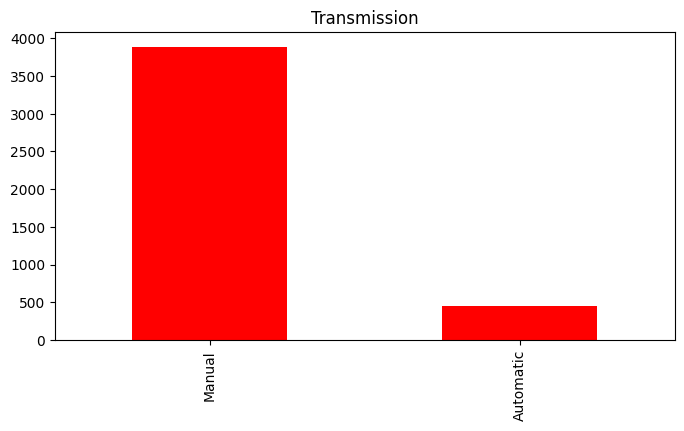

In [ ]:
#Graph to view sales classified by transmission

df["transmission"].value_counts(sort = True).plot(kind="bar", color=["red"], figsize=(8, 4) , title='Transmission');


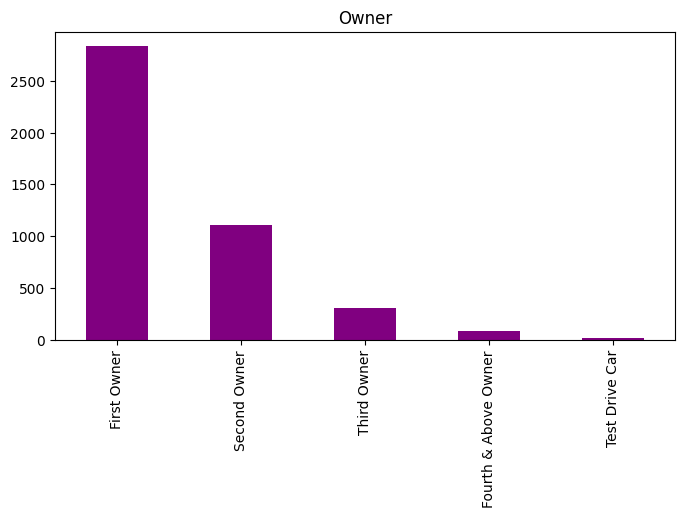

In [ ]:
#Graph to view sales classified by owner

df["owner"].value_counts(sort = True).plot(kind="bar", color=["purple"], figsize=(8, 4) , title='Owner');

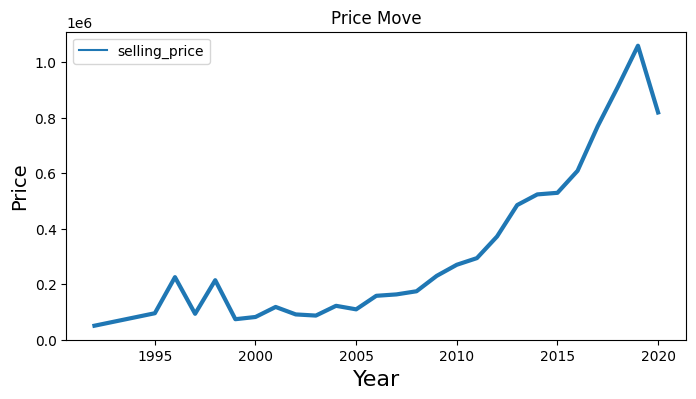

In [ ]:
#We will display bar graphs line
def line_plot(data, title ,xlabel, ylabel):
    plt.figure(figsize=(8, 4))
    sns.lineplot(data=data , palette="tab10", linewidth=3.0)
    plt.title(title, fontsize=12)
    plt.ylabel(ylabel, size=14)
    plt.xlabel(xlabel, size=16)

df_price_move = df.groupby(['year'])[['selling_price']].mean()
line_plot(df_price_move,'Price Move', 'Year', "Price")

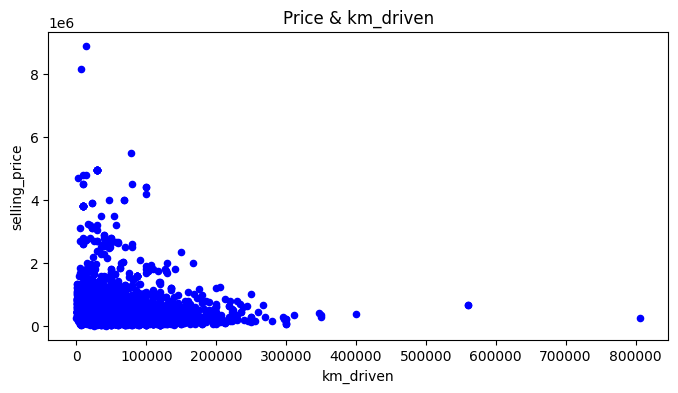

In [ ]:
#The relationship between km_driven and price

#We will display bar graphs scatter
df.plot(x="km_driven", y="selling_price", kind="scatter", figsize=(8, 4), title="Price & km_driven", color="blue");

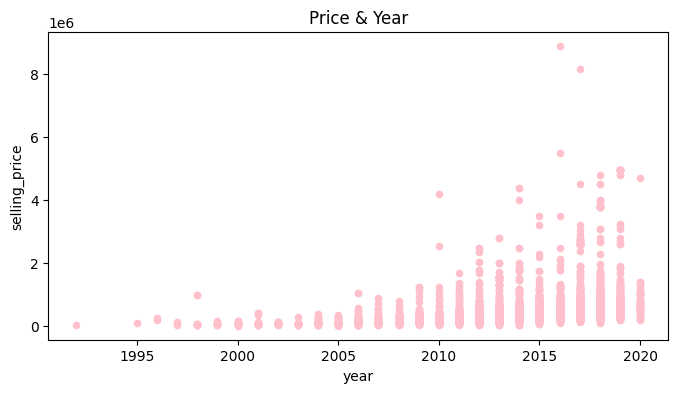

In [ ]:
#The relationship between km_driven and year

#We will display bar graphs scatter

df.plot(x="year", y="selling_price", kind="scatter", figsize=(8, 4), title="Price & Year", color="pink");


In [ ]:
# finds the correlation
df.corr()

<ipython-input-69-ce3dbddde9bf>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,year,selling_price,km_driven
year,1.000000,0.413922,-0.419688
selling_price,0.413922,1.000000,-0.192289
km_driven,-0.419688,-0.192289,1.000000


<ipython-input-70-f379c3f833ec>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()
<ipython-input-70-f379c3f833ec>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


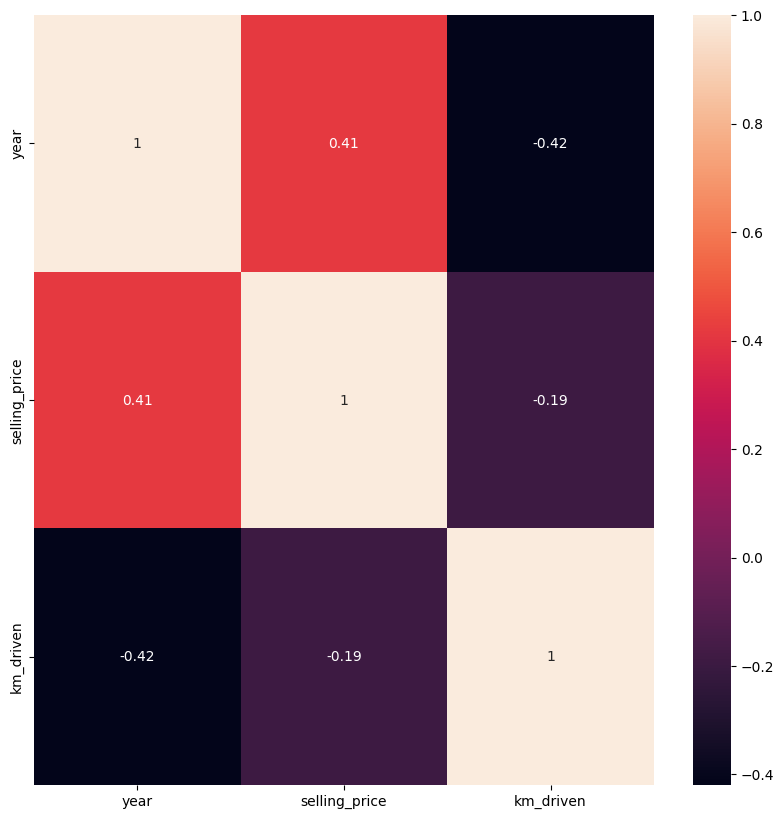

In [ ]:
#We will display heatmap
corr = df.corr()
corr = corr['selling_price']
corr = corr.sort_values(ascending=False)
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
# import preprocessing from sklearn
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
# limit to categorical data using df.select_dtypes()
data2 = df.select_dtypes(include=[object])#Extracting non-numeric columns
data2.head(3)

,name,fuel,seller_type,transmission,owner,brand
0,Maruti 800 AC,Petrol,Individual,Manual,First Owner,Maruti
1,Maruti Wagon R LXI Minor,Petrol,Individual,Manual,First Owner,Maruti
2,Hyundai Verna 1.6 SX,Diesel,Individual,Manual,First Owner,Hyundai


In [ ]:
#name--owner--brand convert these columns to numbers
le = preprocessing.LabelEncoder()
df['name']= le.fit_transform(df['name'])
df['owner']= le.fit_transform(df['owner'])
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
0,775,2007,60000,70000,Petrol,Individual,Manual,0,Maruti
1,1041,2007,135000,50000,Petrol,Individual,Manual,0,Maruti
2,505,2012,600000,100000,Diesel,Individual,Manual,0,Hyundai
3,118,2017,250000,46000,Petrol,Individual,Manual,0,Datsun
4,279,2014,450000,141000,Diesel,Individual,Manual,2,Honda


In [ ]:
#convert these columns (fuel, seller_type, transmission)
enc = OneHotEncoder(sparse = False)
X4 = df[["fuel", "seller_type", "transmission"]]
X5 = enc.fit_transform(X4)
new_col = enc.get_feature_names_out(["fuel","seller_type","transmission"])
df[new_col] = X5
df.head()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
0,775,2007,60000,70000,Petrol,Individual,Manual,0,Maruti,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1041,2007,135000,50000,Petrol,Individual,Manual,0,Maruti,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,505,2012,600000,100000,Diesel,Individual,Manual,0,Hyundai,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,118,2017,250000,46000,Petrol,Individual,Manual,0,Datsun,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,279,2014,450000,141000,Diesel,Individual,Manual,2,Honda,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


<ipython-input-74-579a5b54bd3f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr()[["selling_price"]].sort_values("selling_price", ascending = False),vmin = -1, vmax = +1, annot = True, ax = ax)


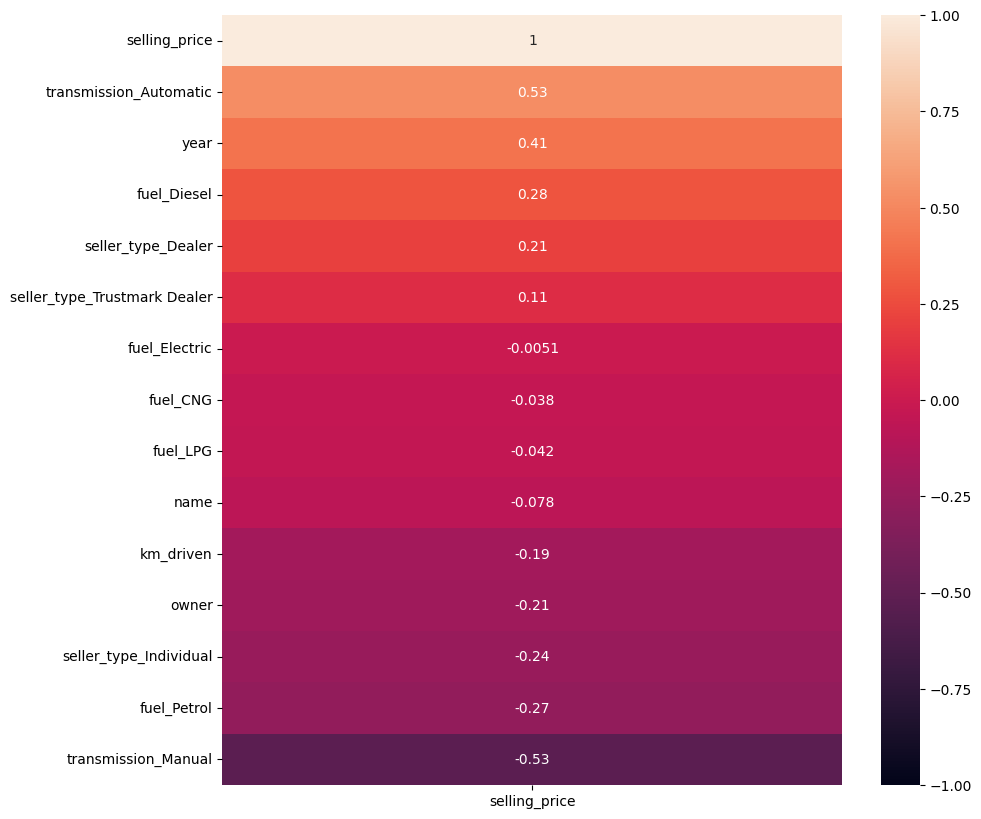

In [ ]:
#new heatmap
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(df.corr()[["selling_price"]].sort_values("selling_price", ascending = False),vmin = -1, vmax = +1, annot = True, ax = ax)
plt.show()

**📄 Report**

**I will make things brief. Through our journey in analyzing the data, we found that**



1.Best selling brand is Maruti then Hyundai

2.Manuals sell more than automatics

3.The newer the car the better it sells

4.Individual sell more

5.Petrol and Diesel sell more

6.Most sales were made in 2017


**There are factors that affect on car price**

1.The year, the newer the year, the higher the price

2.The KM Driving when increase price of car decreased

3.Brand and model of the car